# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [4]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# 設定 data_path
dir_data = './'

In [6]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [8]:
#1
"""
Your code here
"""
cut_rule = [0, 1, 3, 6, float('inf')]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, \
                                         bins=cut_rule, \        # 分組依據
                                         include_lowest=True, \  # 包含第一組的左界值（即 0）
                                        )
                                         # labels=["0 個小孩", "1-2 個小孩", "3-5 個小孩", "超過 5 個小孩"])
app_train['CNT_CHILDREN_GROUP'].value_counts()

CNT_CHILDREN_GROUP
(-0.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 6.0]          534
(6.0, inf]           21
Name: count, dtype: int64

In [9]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']  # 依據 CNT_CHILDREN_GROUP 與 TARGET 分組。

grouped_df = app_train.groupby(grp, observed = True)['AMT_INCOME_TOTAL']
# observed=True：只顯示實際存在的組合

grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         168554.452269
                    1         166133.317001
(1.0, 3.0]          0         173824.963059
                    1         161627.570234
(3.0, 6.0]          0         173158.841202
                    1         150114.705882
(6.0, inf]          0         134500.000000
                    1         255000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

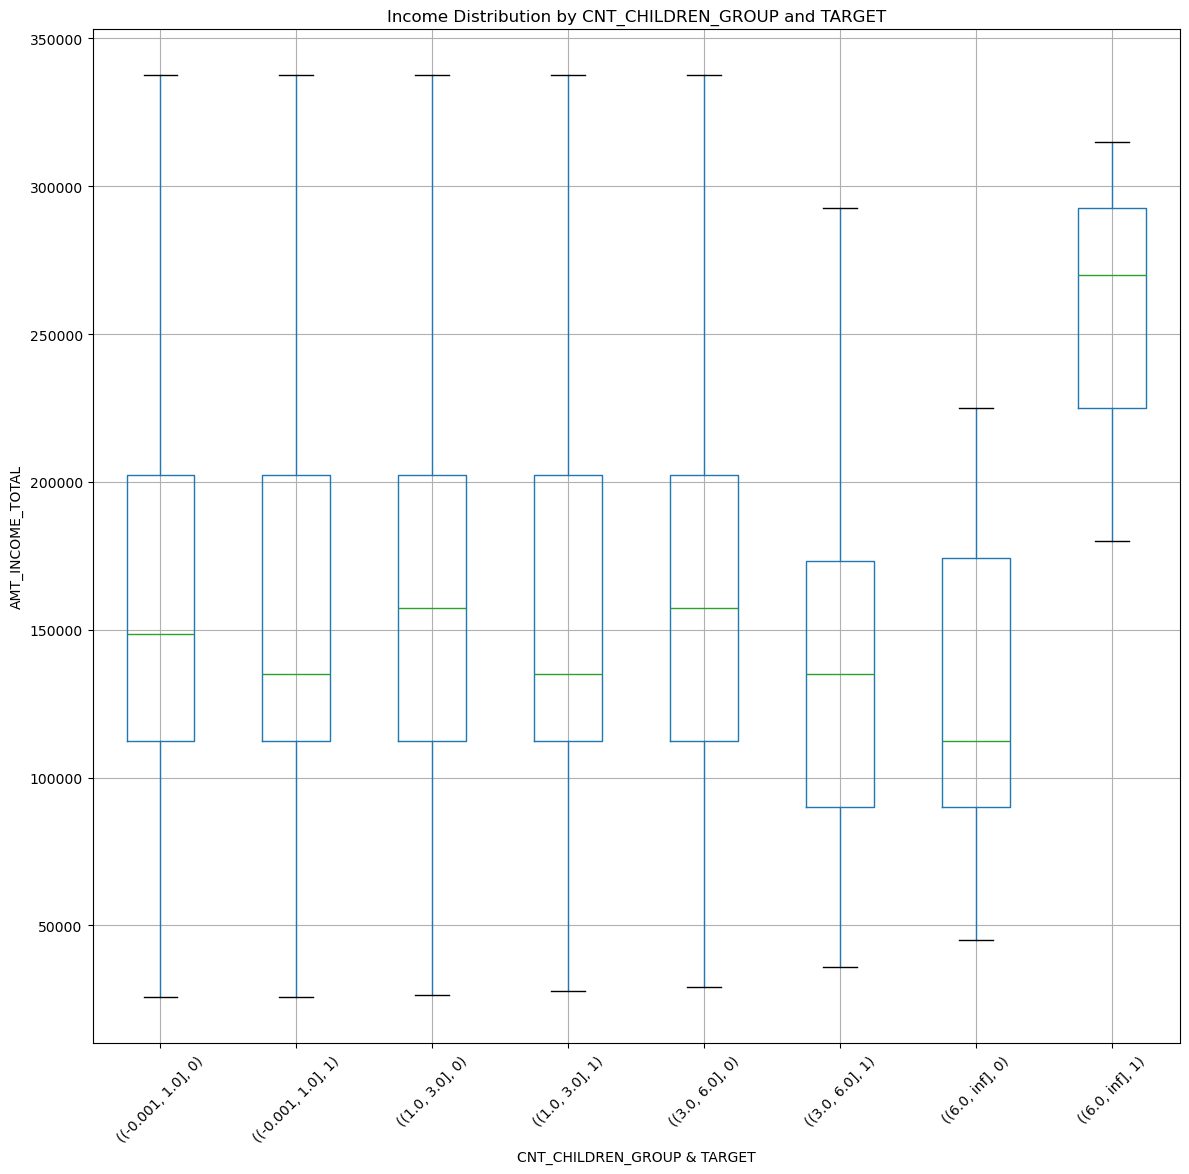

In [10]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
# 繪製 AMT_INCOME_TOTAL 的 Boxplot。
# column=plt_column → 要繪製的欄位。
# by=plt_by → 依 CNT_CHILDREN_GROUP & TARGET 分組。
# showfliers=False → 不顯示離群值。

plt.title('Income Distribution by CNT_CHILDREN_GROUP and TARGET')
plt.suptitle('')  # 移除多餘標題
plt.xticks(rotation=45)  # x 軸標籤旋轉 45 度，避免重疊
plt.xlabel('CNT_CHILDREN_GROUP & TARGET')
plt.ylabel('AMT_INCOME_TOTAL')
plt.tight_layout()
plt.show()

In [11]:
#3
"""
Your code here
"""
grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'], observed = True)['AMT_INCOME_TOTAL']

# app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean())/ x.std())
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.transform(lambda x: (x - x.mean())/ x.std())
# transform(lambda x: (x - x.mean()) / x.std())：
# 對 每組計算 Z 分數，並將結果對應至原資料表


app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()


,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.045954
1,270000.0,0.962147
2,67500.0,-0.958437
3,135000.0,-0.318243
4,121500.0,-0.446282


In [25]:
# grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'], observed = True)['AMT_INCOME_TOTAL']

# grouped_df.apply(lambda x: (x - x.mean())/ x.std())


CNT_CHILDREN_GROUP  TARGET        
(-0.001, 1.0]       0       1         0.962147
                            2        -0.958437
                            3        -0.318243
                            4        -0.446282
                            5        -0.659680
                                        ...   
(6.0, inf]          0       267998   -1.077729
                            305112   -0.294535
                    1       23881    -1.091089
                            34545     0.872872
                            276768    0.218218
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64